In [67]:
import json
from pprint import pprint
from termcolor import colored
from colored import fg, bg, attr
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# if using a Jupyter notebook, includue:
%matplotlib inline
data_file = "predictor_result/scores_predict_88_acc.jsonl"
id2name = "../data/id2name.json"

NUMBER_OF_SAMPELS = 100

color = bg('yellow_1') + fg('black')
reset = attr('reset')
blue = "blue"
green = "green"

print()

with open(id2name, 'r') as fp:
    id2name = json.load(fp)


In [68]:
def change_word_by_entity(entity_str, this_sentence,i,color):
        if list(map(lambda x: x.lower(), this_sentence[i:i + len(entity_str.split(" "))])) == entity_str.split():
            this_sentence = this_sentence[:i] + [colored(w, color, attrs=['bold']) for w in entity_str.split()] + \
                            this_sentence[i + len(entity_str.split(" ")):]
        return this_sentence


In [69]:
preffix = ""
def _show_sentence(head,tail,this_sentence,relation,correct_relation = None, is_prediction = False,prob : str = "",score: str = ""):
#     print(preffix + "head:", colored(head, 'blue', attrs=['bold']), "  ,  ", "tail", colored(tail, 'green', attrs=['bold']))          
    this_sentence = this_sentence.split()
    for i, word in enumerate(this_sentence):
            if word.lower() == head.split()[0]:
                this_sentence = change_word_by_entity(head, this_sentence,i,blue)
            if word.lower() == tail.split()[0]:
                this_sentence = change_word_by_entity(tail, this_sentence,i,green)
    color = 'yellow' if correct_relation is None or relation == correct_relation else 'grey'
    if is_prediction: color = "red"
    if len(prob) > 0:
        print(preffix + colored(relation, color,attrs=['bold']) + "\t", " ".join(this_sentence) +" " + colored(prob, "magenta",attrs=['bold'])+"; "+ 
              colored(score, "magenta",attrs=['bold']))
    else:
        print(preffix + colored(relation, color,attrs=['bold']) + "\t", " ".join(this_sentence))

In [70]:
def show_set(data):
    correct_relation = data['correct_relation']
    prediction = data["prediction"]
    query = data['query']
    head = data['query_head']
    tail = data['query_tail']
    probability = data['probability'].replace("'","")[1:-1].split(",")
    scores = data['scores']
    _show_sentence(head,tail,query,correct_relation)
    print()

    for k in range(5):
        this_sentence = data["sentence_" +str(k)]
        head = data['sentence_'+str(k)+'_head']
        tail = data['sentence_'+str(k)+'_tail']
        relation = data['sentence_'+str(k)+'_relation']
        _show_sentence(head,tail,this_sentence,relation,correct_relation,  k == int(prediction),probability[k],
                       "{:.2f}".format(scores[k]))
    print()
    return correct_relation
        

In [142]:
total_wrong = 0
total_correct = 0
result_per_type = {}
correct_scroes = []
wrong_scores = []
pred_list = []
gold_list = []
prediction_which_rel = {}
with open(data_file) as f:
    for ex_index,line in enumerate(f,1):
        data = json.loads(line)
        scores = data['scores']
        pred_rel = data['sentence_' + data["prediction"] +'_relation']
        pred_score = scores[int(data["prediction"])]
        the_gold_rel = data['correct_relation']
        gold_list.append(the_gold_rel)
        pred_list.append(pred_rel)
        prediction_which_rel[the_gold_rel] = prediction_which_rel.get(the_gold_rel,Counter())
        prediction_which_rel[the_gold_rel].update([pred_rel])
        if data['answer'] == "wrong":
            total_wrong +=1
            print("wrong example number: ",total_wrong,  "example number: ", ex_index)
            show_set(data)
            print()
            wrong_scores.append(pred_score)
            result_per_type[the_gold_rel] = result_per_type.get(the_gold_rel,[[],[]])
            result_per_type[the_gold_rel][0].append(data)
            
            
        else:
            result_per_type[the_gold_rel] = result_per_type.get(the_gold_rel,[[],[]])
            result_per_type[the_gold_rel][1].append(data)
            correct_scroes.append(pred_score)
            total_correct +=1





wrong example number:  1 example number:  2
crosses	 The route crosses the minnesota river at the cedar avenue bridge between Bloomington and Eagan .

position played on team / speciality	 He competed with David Harris , elandon roberts , and Trevor Bates throughout training camp for the starting middle linebacker job . 0.00; 38.15
original language of film or TV show	 The occupancy of the show surpassed the hindi films baar baar dekho and Freaky Ali .  0.00; 37.06
located in or next to body of water	 Employing Christian craftsmen , he built a fleet , with which he captured Phocaea and the eastern aegean islands of Lesbos ( except for the fortress of Methymna ) , samos , Chios and Rhodes .  0.57; 58.40
crosses	 Four bridges cross the river tyne at the Quayside : The High Level Bridge , the Swing Bridge , the Tyne Bridge and the gateshead millennium bridge .  0.43; 58.14
main subject	 The basel computational biology conference ( stylized as [ BC]2 ) is a scientific meeting on the subjec

wrong example number:  42 example number:  365
part of	 " Un - American Graffiti " is the sixteenth episode of the third season of the American mystery television series " Veronica Mars " , and the sixtieth episode overall .

member of	 saint vincent and the grenadines shares the same monarch in personal union with each of 15 other monarchies in the 52-member commonwealth of nations , a grouping known informally as the Commonwealth realms . 0.22; 48.18
child	 In 1816 , the family enterprise began to take shape when founder john molson entered into an association with his three sons , John junior , Thomas and william .  0.00; 40.93
crosses	 maha chesadabodindranusorn bridge ( , , ) is a bridge in area of Mueang Nonthaburi District in Nonthaburi Province , Thailand , over the chao phraya river .  0.00; 43.59
part of	 Peter Margetson Wallace ( 1780 - 1864 ) was a career soldier in the british army who rose to be Colonel - Commandant of the royal artillery and a full General .  0.02; 45.51

wrong example number:  157 example number:  1470
spouse	 He was buried in Ferncliff Cemetery in Hartsdale , New York , near the graves of his grandparents , malcolm x and betty shabazz .

sport	 jozef balej ( born February 22 , 1982 ) is a Slovak professional ice hockey right winger currently playing for KHL Medveščak Zagreb of the Austrian Hockey League ( EBEL ) . 0.00; 39.57
spouse	 The Romanovs were a powerful boyar family ; Michael 's great - aunt ( the sister of his grandfather ) was anastasia romanovna , the wife of ivan the terrible .  0.01; 52.89
child	 In due course , the union of arjuna and Subhadra produced a son , abhimanyu .  0.99; 57.61
voice type	 gustave botiaux ( born 14 July 1926 in Puteaux ) is a French tenor .  0.00; 39.14
constellation	 lambda caeli , Latinized from λ Caeli , is a star in the constellation caelum .  0.00; 39.55


wrong example number:  158 example number:  1471
child	 Around 1327 , Magnus married sophia ( died 1356 ) , the daughter of Henry I , Mar

position played on team / speciality	 With this achievement , he became the fourth running back in the Redskins ' franchise history to have at least three 1,000-yard seasons along with john riggins , Clinton Portis , and Stephen Davis .  0.56; 45.98
located in or next to body of water	 The Königstuhl summit allows visitors a spectacular view of the city of heidelberg and the neckar river .  0.00; 34.89


wrong example number:  282 example number:  2522
sport	 christian chagnon ( born February 20 , 1956 in Vaudreuil - Dorion , Quebec ) is a former Canadian handball player who competed in the 1976 Summer Olympics .

competition class	 Gómez has had some success at heavyweight , capturing wins over Sinan Samil Sam and David Defiagbon , but was shockingly TKO'd by fellow Cuban yanqui díaz in the first round in 2004 . 0.04; 54.51
sport	 He plays gaelic football with his local club carrigaline and was a member of the Cork senior inter - county team between 1998 and 2012 .  0.22; 56.22
main s

wrong example number:  403 example number:  3606
spouse	 The record company was renamed Columbia Recording Corporation , White , Raymond E. " King of the Cowboys , Queen of the West : roy rogers and dale evans " .

child	 Cherie Gil is the daughter of Filipino actors eddie mesa and Rosemarie Gil , and sister of fellow actors , Michael de Mesa and the late mark gil . 0.96; 52.97
part of	 The road then travels along the northern coast of Lantau Island , next to the Airport Express and tung chung line of the mass transit railway ( MTR ) .  0.00; 42.58
follows	 Kitsarat asks for assistance from the Siamese King and was granted independence from lan xang , creating the kingdom of luang phrabang and converting lan xang into the Kingdom of Vientiane .  0.00; 42.91
spouse	 King malcolm iii of scotland married Edgar 's sister margaret , and came into opposition to William who had already disputed Scotland 's southern borders .  0.04; 49.87
constellation	 hip 14810 is a G - type main - sequence 

wrong example number:  534 example number:  4646
member of	 justin mauriello ( born 1975 ) is the lead singer and guitarist for the alternative rock band darling thieves , and former guitarist and founding member of punk rock band Zebrahead .

member of	 Similarly , Dutch companies have seen indonesia as their gateway to the larger asean market , which is home to more than 500 million people . 0.12; 44.48
voice type	 niels juel simonsen ( born 16 May 1846 in Copenhagen , died 25 May 1906 also in Copenhagen ) was Danish baritone opera singer , who made his debut in 1874 .  0.73; 46.28
spouse	 Sarah Marshall is the granddaughter of michèle morgan and william marshall , and the daughter of Mike Marshall .  0.01; 42.04
child	 13.495 His tomb was the vantage point which polites , son of priam , used to scout the Greek camp during the Trojan War . Homer .  0.12; 44.44
part of	 Available line in Tokyo is the East Japan Railway Company chūō main line from the mitaka station to the Tokyo Statio

wrong example number:  649 example number:  5801
member of	 In 2003 , he married vicki peterson of the bangles .

position played on team / speciality	 miguel ángel jean sanó ( born May 11 , 1993 ) is a Dominican professional baseball third baseman and designated hitter for the Minnesota Twins of Major League Baseball ( MLB ) . 0.09; 44.50
member of	 ku leuven is a member of the coimbra group ( a network of leading European universities ) as well as of the LERU Group ( League of European Research Universities ) .  0.38; 45.98
main subject	 The use of the word in science fiction dates back at least to 1970 when James Blish 's star trek novel " Spock Must Die ! "  0.47; 46.19
follows	 He was a member of Japan national team for 1923 far eastern championship games football competition in Osaka and 1925 far eastern championship games football competition in Manila .  0.00; 39.75
mother	 His first wife katharine sergeant angell white was fiction editor of " The New Yorker " and their son rog

wrong example number:  775 example number:  6873
member of	 Released on 17 October 2011 , it is the first studio album released by eponymous frontman noel gallagher since his departure from oasis in August 2009 and the group 's eventual dissolution .

original language of film or TV show	 She then appeared in hindi films such as " Zila Ghaziabad " and " R ... Rajkumar " . 0.00; 36.47
member of	 Mexico became the first team from outside UEFA or conmebol to take a point from brazil in the World Cup .  0.19; 44.64
constellation	 AB Pictoris ( abbreviated AB Pic , also catalogued as hd 44627 ) is a K - type star , approximately 148 light - years away in the constellation of pictor .  0.53; 45.70
child	 Charles Stuart - Wortley - Mackenzie , a son of James Stuart - Wortley - Mackenzie , 1st Baron Wharncliffe .  0.00; 39.58
position played on team / speciality	 Derrick Gaffney was a Jets wide receiver 1978–87 ; his son jabar gaffney was a Patriots WR from 2006–8 .  0.28; 45.05


wrong exampl

wrong example number:  905 example number:  8141
part of	 Sprinkling Tarn is a body of water at the foot of great end , in the southern fells in Lake District , 3 km from Seathwaite , Cumbria , England .

located in or next to body of water	 In March 1974 , Williams travelled to erith island in bass strait with the historians Stephen Murray - Smith and Ian Turner , and fellow painter Clifton Pugh . 1.00; 58.37
mother	 He was baptised in the Orthodox faith , his godparents being queen anne ( his maternal grandmother ) and crown princess margareta of romania ( his maternal aunt ) .  0.00; 35.58
part of	 Okskaya Ulitsa is a future station on the kozhukhovskaya line of the moscow metro .  0.00; 47.79
position played on team / speciality	 Veteran linebacker roman phifer , who had started on all three of the Patriots ' Super Bowl teams , was also released , Phifer sent packing by Patriots CBC Sports .  0.00; 37.71
constellation	 ngc 82 is a magnitude 14.8 star located in the andromeda conste

part of	 The three mountains of dewa refer to mount gassan , Mount Haguro , and Mount Yudono , which resides roughly at the center of Yamagata Prefecture . 0.60; 48.89
position played on team / speciality	 Linebacker # 59 Jack Ham and cornerback # 47 mel blount arrived in 1971 .  0.04; 46.23
member of	 In 2010 , the West African country ivory coast petitioned the united nations to complete the demarcation of the Ivorian maritime boundary with Ghana .  0.01; 44.61
crosses	 The west river drive bridge crosses diagonally beneath it , carrying the Dr. Martin Luther King , Jr. , Drive over the schuylkill river .  0.00; 42.30
follows	 From 1987 to 1989 , Overkill released " Taking Over " , " under the influence " and " the years of decay " , three albums considered their best .  0.34; 48.33


wrong example number:  1025 example number:  9195
main subject	 " nature materials " is focused on all topics within the combined disciplines of " materials science " and " engineering " .

part of	 Abe

In [72]:
print(total_wrong/(total_correct+total_wrong))
print((total_correct+total_wrong))

0.1134
10000


In [73]:
for k,v in result_per_type.items():
    print("acc for ", k)
#     print("total from this category:",(len(v[0])+len(v[1])))
    print(len(v[1])/ (len(v[0])+len(v[1]) ))

acc for  member of
0.7068403908794788
acc for  crosses
0.9608433734939759
acc for  part of
0.45320197044334976
acc for  mother
0.9334442595673876
acc for  child
0.9182692307692307
acc for  main subject
0.7688356164383562
acc for  military rank
0.9717868338557993
acc for  located in or next to body of water
0.8836858006042296
acc for  voice type
1.0
acc for  follows
0.940625
acc for  original language of film or TV show
1.0
acc for  position played on team / speciality
0.9934959349593496
acc for  spouse
0.7610062893081762
acc for  competition class
0.9895052473763118
acc for  constellation
0.9968701095461658
acc for  sport
0.8782161234991424


In [74]:
# check similarity between relations on train and dev
wrong_scores = np.array(wrong_scores)
correct_scroes = np.array(correct_scroes)


In [75]:
print(wrong_scores.mean())
print(wrong_scores.std())
print()
print(correct_scroes.mean())
print(correct_scroes.std())

51.28854679935193
4.716667833547981

59.225879765567996
6.527488833119853


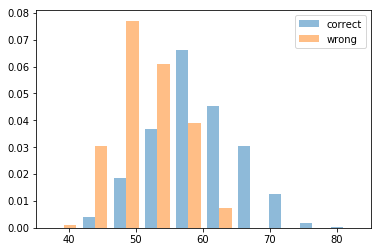

In [76]:
bins = [35,45,55,60,65,70]
plt.hist([correct_scroes,wrong_scores], 10, alpha=0.5, label=['correct','wrong'],density=True)
# plt.hist(wrong_scores, 10, alpha=0.5, label='wrong')
plt.legend(loc='upper right')
# plt.show()

In [77]:
# check unigrams intersection with other relations, both on tokens and entities
# on train as well
for d in result_per_type['member of'][1]:
    show_set(d)
    print()
    

member of	 Being member of european economic area ( EEA ) , Norway implemented the european union directive 2002/24/EC .

sport	 benoît laffineur ( born 30 October 1957 ) is a French former swimmer . 0.00; 40.36
follows	 Wilson was re - elected in the 2003 , 2006 , and 2009 general elections .  0.07; 44.06
member of	 The inaugural Lord Lewis Prize was awarded to lord may of oxford , former President of the royal society and Chief Scientific Advisor to the UK Government , in 2008 .  0.81; 46.46
mother	 In 579 , her stepson Hermenegild married her granddaughter Ingund , daughter of goiswintha 's daughter brunhilda by the Frankish king Sigebert I.  0.00; 40.32
original language of film or TV show	 The film stars the familiar characters from the finnish TV show " the autocrats " in a fairy tale where the inhabitants of a small finnish village have to defend themselves against a despotic emperor .  0.12; 44.52


member of	 papua new guinea became a participating economy in the Asia - Pacifi

sport	 olga kirichenko ( born 27 January 1976 ) is an Ukrainian former swimmer who competed in the 1992 Summer Olympics .  0.01; 45.12
original language of film or TV show	 The film was also remade in hindi as " tulsi " .  0.00; 39.58


member of	 The medals were presented by barry maister , ioc member , New Zealand and David Lappartient , Vice President of the UCI .

position played on team / speciality	 andrew victor saville ( born 12 December 1964 ) is an English former professional footballer who played as a striker . 0.00; 42.90
member of	 The brotherhood team is mystique , Magneto and the Juggernaut .  1.00; 50.83
child	 This was the first time a British woman had qualified for the French Open since kate brasher , the daughter of Shirley Bloomer and chris brasher , in 1983 .  0.00; 42.45
mother	 A curator of the Royal Estates upon Ioan Kalinderu 's death , the " White Prince " was famous as the lover of Queen marie of romania , and alleged father of princess ileana .  0.00; 40.90

member of	 The only popular cover not on this album was " Sweet Dreams " ; annie lennox of the eurythmics had refused to allow the band 's version of her song to be released .

military rank	 President Farooq Leghari who supported the cause of Chief Justice Shah also had to resign when army chief general jehangir karamat and Chairman joint chiefs Air Chief Marshal Feroze Khan intervened to resolve the crises . 0.00; 42.82
mother	 He is also survived by his brothers , Jackie , Tito , jermaine , Marlon and Randy ; sisters Rebbie , La Toya and Janet ; and parents Joseph and katherine .  0.00; 37.06
main subject	 The first mention of the Maitreya in a theosophical context occurs in the 1883 work " Esoteric Buddhism " by Alfred Percy Sinnett ( 1840–1921 ) , an early theosophical writer .  0.00; 43.49
member of	 Dee was replaced three months later by Judas Priest 's Scott Travis , as aerosmith 's tom hamilton also replaced Mendoza .  1.00; 58.46
located in or next to body of water	 Raduil Po

In [78]:
def show_statson_all_relation(correct = 0):
    pred_acc = []
    scores_result = []
    std_result = [] 
    for k,v in result_per_type.items():
        scores_category = np.array(list(map(lambda x: x['scores'][int(x['prediction'])],v[correct])))
        pred_acc.append(len(v[1])/(len(v[0])+len(v[1]))*100)
        scores_result.append(scores_category.mean())
        std_result.append(scores_category.std())
        print(f"{k}:\t {scores_category.mean():.2f} +- {scores_category.std():.2f} ; {len(v[1])/(len(v[0])+len(v[1]))*100:.2f}%")
    #     print( k ,scores_category.mean(), "+-",scores_category.std(), " Acc is:", len(v[1])/(len(v[0])+len(v[1])))
    pred_acc = np.array(pred_acc)
    scores_result = np.array(scores_result)
    std_result = np.array(std_result)
#     X = np.stack((pred_acc,scores_result),axis=0)
#     print(np.cov(X))
#     print(np.corrcoef(np.stack((pred_acc,scores_result),axis=0)))
    return pred_acc,scores_result,std_result

In [79]:
pred_acc,scores_result_correct,std_result_correct = show_statson_all_relation(1)

member of:	 52.39 +- 4.81 ; 70.68%
crosses:	 57.70 +- 1.81 ; 96.08%
part of:	 49.53 +- 4.92 ; 45.32%
mother:	 57.80 +- 3.45 ; 93.34%
child:	 57.03 +- 3.17 ; 91.83%
main subject:	 51.97 +- 5.47 ; 76.88%
military rank:	 56.74 +- 2.41 ; 97.18%
located in or next to body of water:	 57.38 +- 4.81 ; 88.37%
voice type:	 66.81 +- 3.63 ; 100.00%
follows:	 54.76 +- 5.30 ; 94.06%
original language of film or TV show:	 67.70 +- 5.75 ; 100.00%
position played on team / speciality:	 65.38 +- 4.11 ; 99.35%
spouse:	 56.09 +- 4.41 ; 76.10%
competition class:	 65.38 +- 3.63 ; 98.95%
constellation:	 61.39 +- 2.70 ; 99.69%
sport:	 58.71 +- 4.38 ; 87.82%


In [80]:
from scipy.stats import pearsonr


In [81]:
pearsonr(pred_acc,scores_result_correct)


(0.7708279870813365, 0.00047367296754536703)

In [82]:
pred_acc,scores_result_wrong,std_result_wrong = show_statson_all_relation(0)

member of:	 48.09 +- 2.77 ; 70.68%
crosses:	 56.62 +- 2.59 ; 96.08%
part of:	 48.89 +- 3.69 ; 45.32%
mother:	 55.79 +- 3.42 ; 93.34%
child:	 55.71 +- 3.35 ; 91.83%
main subject:	 48.61 +- 3.78 ; 76.88%
military rank:	 54.34 +- 2.02 ; 97.18%
located in or next to body of water:	 55.50 +- 2.95 ; 88.37%
voice type:	 nan +- nan ; 100.00%
follows:	 48.82 +- 3.09 ; 94.06%
original language of film or TV show:	 nan +- nan ; 100.00%
position played on team / speciality:	 57.59 +- 3.30 ; 99.35%
spouse:	 54.66 +- 3.31 ; 76.10%
competition class:	 53.89 +- 3.20 ; 98.95%
constellation:	 53.53 +- 1.26 ; 99.69%
sport:	 56.16 +- 2.95 ; 87.82%


In [83]:
pearsonr(pred_acc,scores_result_wrong)

(nan, 1.0)

In [84]:
scores_result_correct - scores_result_wrong

array([ 4.3033874 ,  1.08027885,  0.6406625 ,  2.01155948,  1.32260894,
        3.3636113 ,  2.40315515,  1.88123897,         nan,  5.93286054,
               nan,  7.78982105,  1.43194089, 11.48959497,  7.85309544,
        2.54836989])

In [85]:
print(pred_acc)

[ 70.68403909  96.08433735  45.32019704  93.34442596  91.82692308
  76.88356164  97.17868339  88.36858006 100.          94.0625
 100.          99.3495935   76.10062893  98.95052474  99.68701095
  87.82161235]


In [94]:
from sklearn.metrics import confusion_matrix
mapping_rel_to_index = {}
for i,r in enumerate(result_per_type.keys()):
    mapping_rel_to_index[r] = i

['member of',
 'crosses',
 'part of',
 'mother',
 'child',
 'main subject',
 'military rank',
 'located in or next to body of water',
 'voice type',
 'follows',
 'original language of film or TV show',
 'position played on team / speciality',
 'spouse',
 'competition class',
 'constellation',
 'sport']

In [140]:
# pred_list = []
# gold_list = []
# for k,v in prediction_which_rel.items():
#     gold_list.append(k)
#     this_rel_list = [0] * len(mapping_rel_to_index)
#     for different_relation in v.items():
#         rel_index = mapping_rel_to_index[different_relation[0]]
#         this_rel_list[rel_index] = different_relation[1]
#     pred_list.append(this_rel_list)

In [144]:
pred_list != gold_list

True

In [146]:
from matplotlib.ticker import MultipleLocator
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_major_locator(MultipleLocator(1))
labels = [x for x in result_per_type.keys()]
cm = confusion_matrix(gold_list, pred_list, labels)
print(cm)
lcm = [[np.log1p(x) for x in row] for row in cm ]



[[434   2  27   5   4  12  22   4  24   9   0  12  11  14  22  12]
 [  0 638   2   0   0   0   0  23   0   0   0   0   0   0   1   0]
 [ 31  43 276   3   3  46   6  55   7  33   6   8   1   9  68  14]
 [  0   0   0 561  11   0   0   0   0   0   0   0  28   0   1   0]
 [  0   0   0  12 573   1   1   0   0   0   0   0  36   0   1   0]
 [ 16   4  22   4   2 449   5   5   6  23   6   1   5   3  12  21]
 [  0   0   0   0   1   0 620   0   0   0   0  12   0   3   0   2]
 [  0  64   3   0   0   0   0 585   0   0   0   0   0   0  10   0]
 [  0   0   0   0   0   0   0   0 621   0   0   0   0   0   0   0]
 [  4   1   8   1   2   6   0   3   0 602   0   1   1   0  11   0]
 [  0   0   0   0   0   0   0   0   0   0 603   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 611   0   2   0   2]
 [  1   0   0  77  69   1   2   0   1   0   0   1 484   0   0   0]
 [  0   0   0   0   0   0   1   0   0   0   0   2   0 660   0   4]
 [  0   0   1   0   0   0   0   1   0   0   0   0   0   0 637 

[Text(0, 0.5, 'member of'),
 Text(0, 1.5, 'crosses'),
 Text(0, 2.5, 'part of'),
 Text(0, 3.5, 'mother'),
 Text(0, 4.5, 'child'),
 Text(0, 5.5, 'main subject'),
 Text(0, 6.5, 'military ran'),
 Text(0, 7.5, 'located in o'),
 Text(0, 8.5, 'voice type'),
 Text(0, 9.5, 'follows'),
 Text(0, 10.5, 'original lan'),
 Text(0, 11.5, 'position pla'),
 Text(0, 12.5, 'spouse'),
 Text(0, 13.5, 'competition '),
 Text(0, 14.5, 'constellatio'),
 Text(0, 15.5, 'sport')]

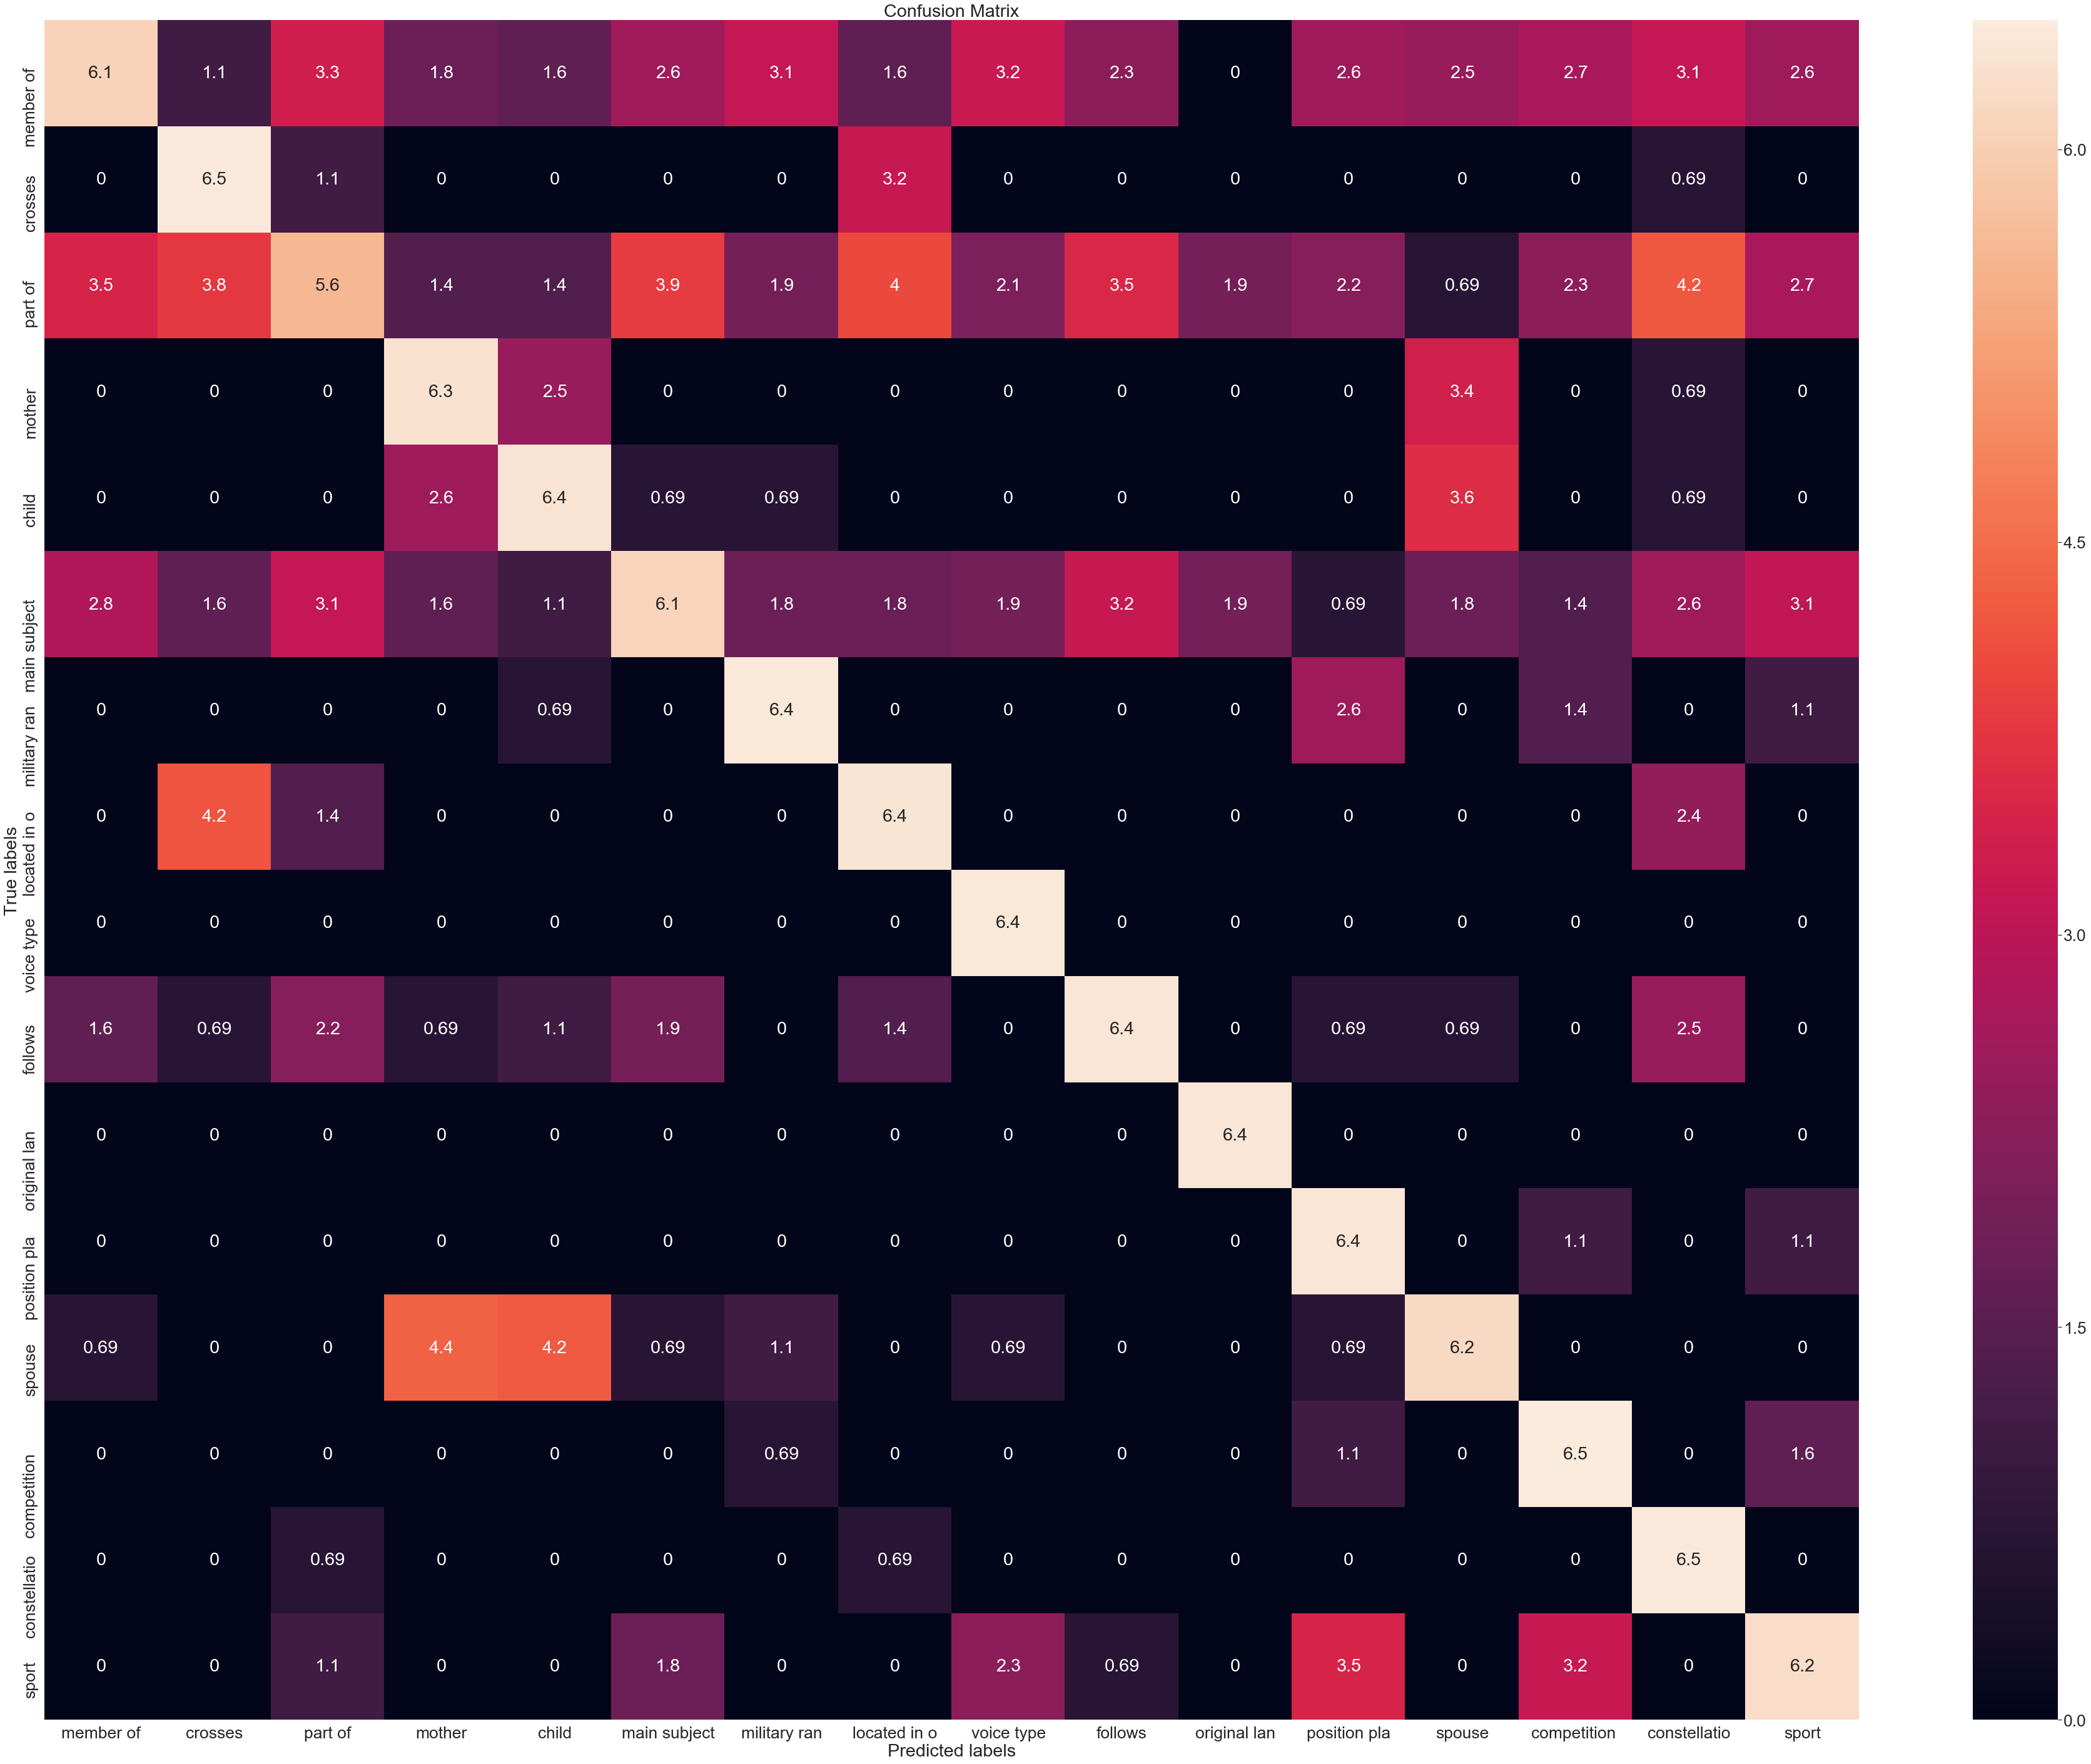

In [147]:
import seaborn as sns
 
fig = plt.figure(figsize=(65,50))
# ax = fig.add_subplot(111)
ax= plt.subplot()
sns.heatmap(lcm, annot=True, ax = ax); #annot=True to annotate cells
sns.set(font_scale=2.4)
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels([x[:12] for x in result_per_type.keys()])
ax.yaxis.set_ticklabels([x[:12] for x in result_per_type.keys()])

In [ ]:
# check agremment with the model prediction 
# try to come up with b=new baselines to show that data is no good
# Elmo should do worse?
# only entity type is helpful?
